<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of Heart Disease Dataset**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Minors/Originals/MODULE 2 PROJECT/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data Preparation

In [6]:
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


Data Visualization

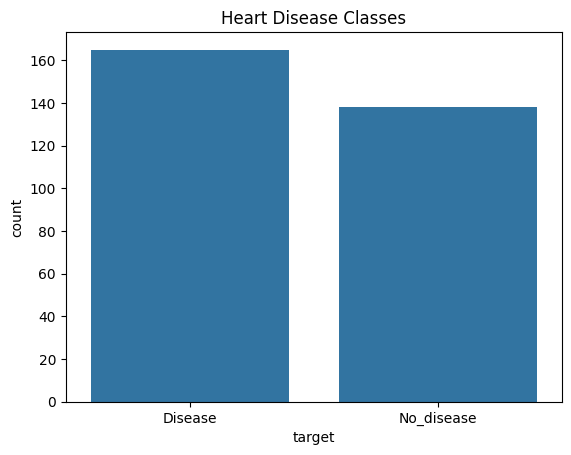

In [8]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

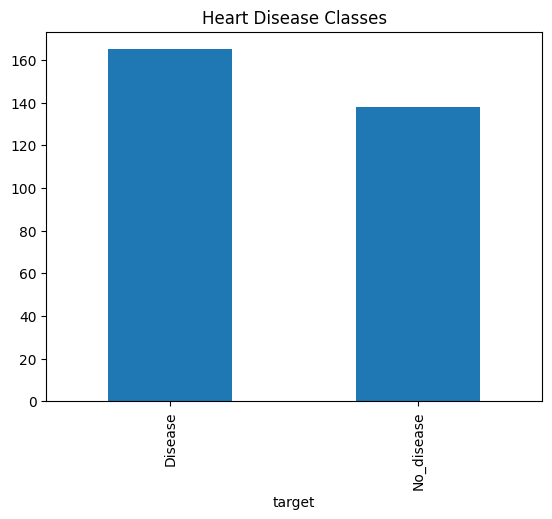

In [9]:
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

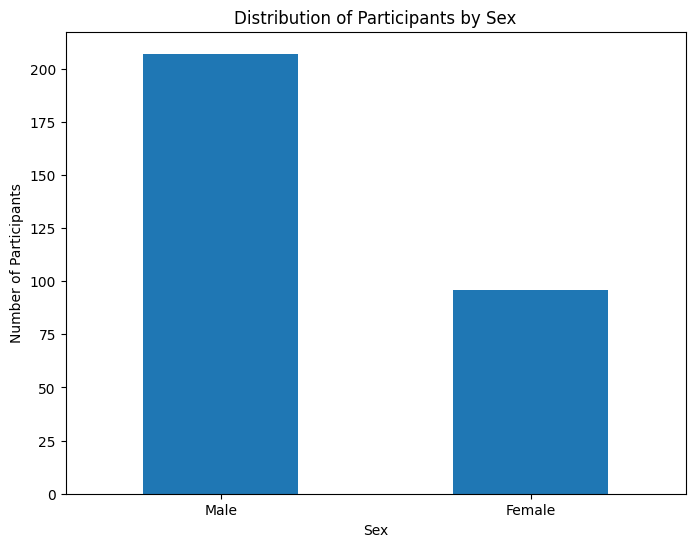

In [10]:
# Count the occurrences of each sex
sex_counts = data['sex'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar')
plt.title('Distribution of Participants by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.show()

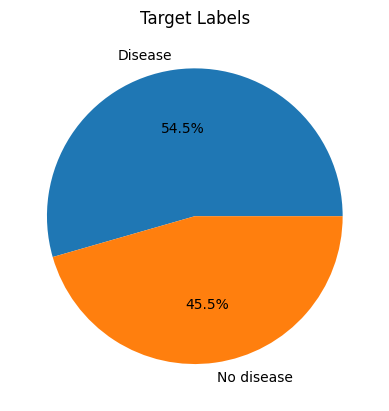

In [11]:
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

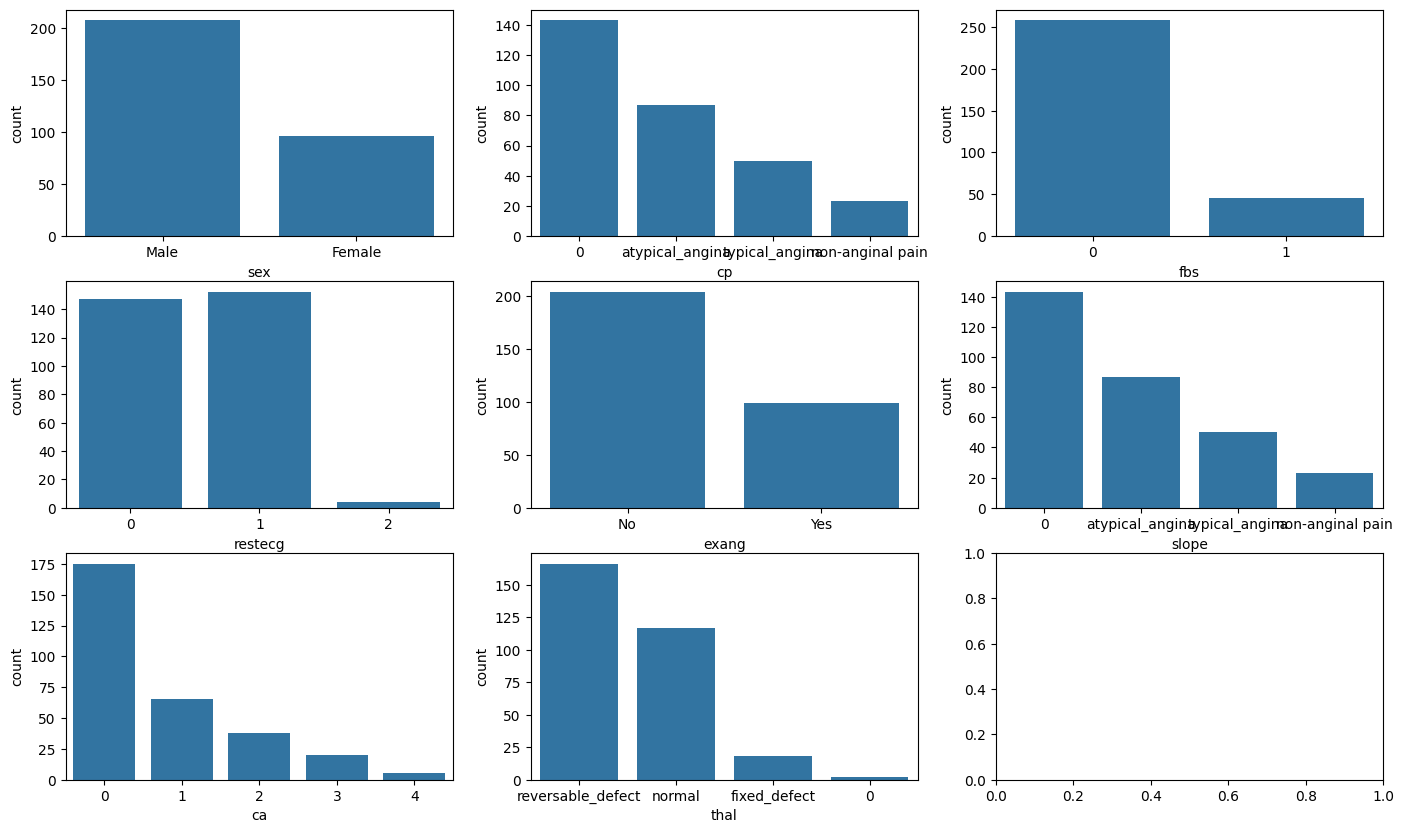

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

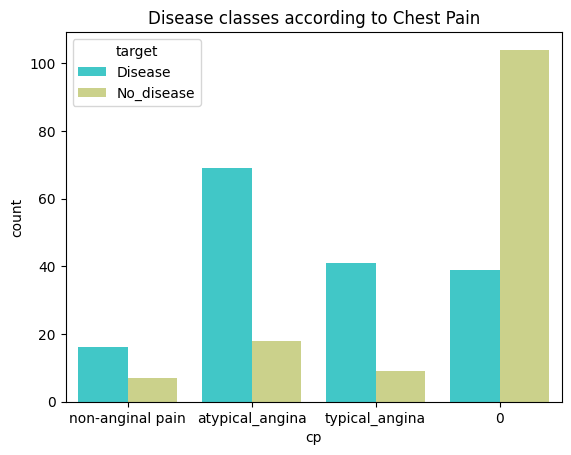

In [13]:
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

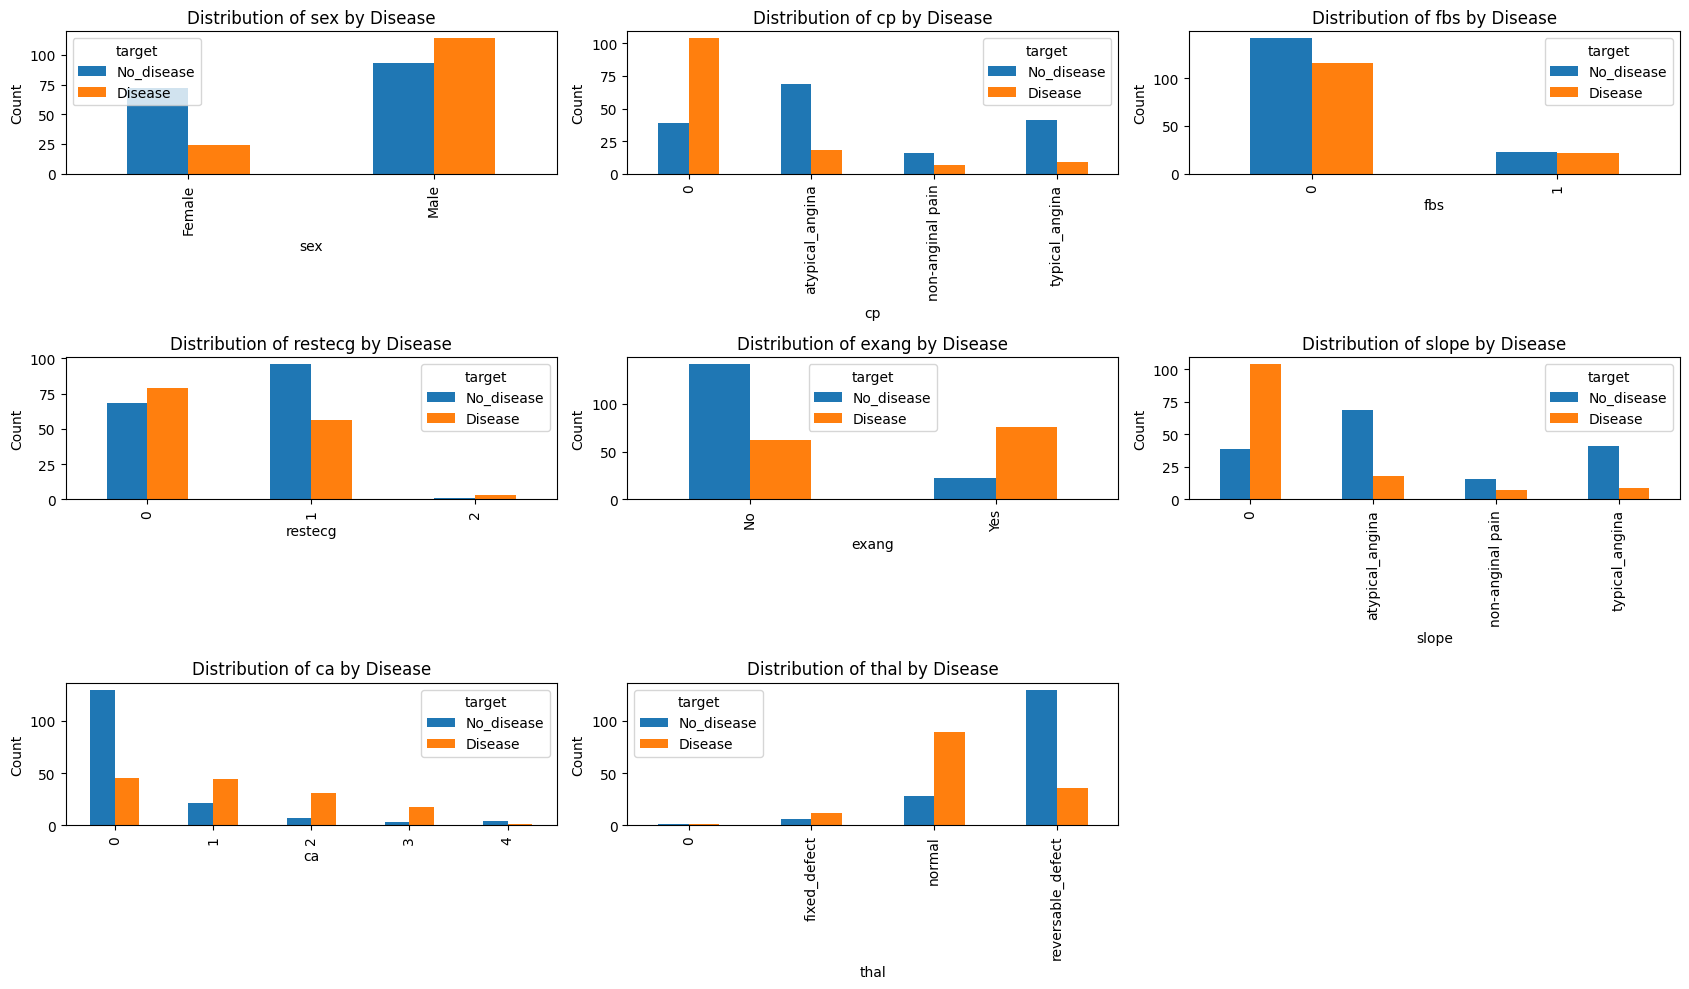

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17, 10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx / 3), idx % 3]
    # Plot the counts of each feature category with respect to disease status
    data.groupby([feature, 'target']).size().unstack().plot(kind='bar', stacked=False, ax=ax)
    ax.set_title(f'Distribution of {feature} by Disease')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='target', labels=['No_disease', 'Disease'])

# Leaving the last subplot empty to match the layout
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.show()

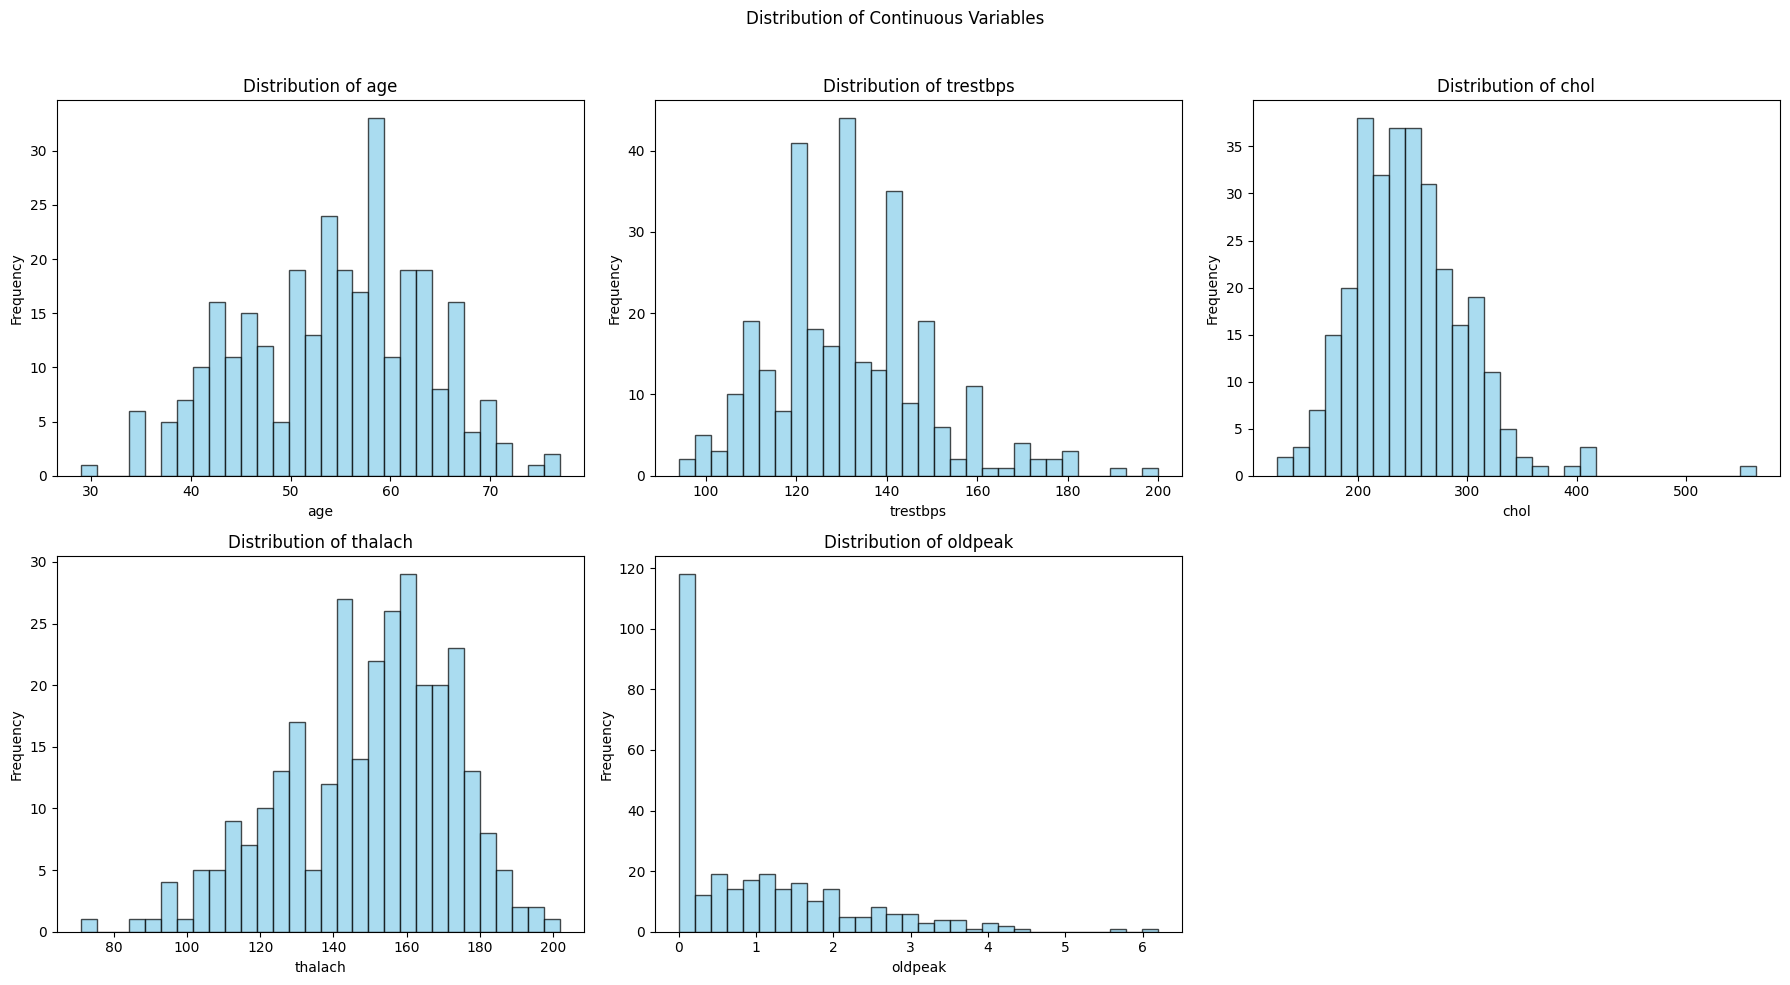

In [15]:
# List of continuous features (update with your actual continuous variable names)
cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # Replace these with actual continuous variable names

# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Distribution of Continuous Variables')

for idx, feature in enumerate(cont_feat):
    ax = axes[int(idx / 3), idx % 3]
    # Plotting histogram for each continuous variable
    data[feature].plot(kind='hist', bins=30, ax=ax, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Remove any empty subplot if fewer than 6 continuous variables
if len(cont_feat) < 6:
    fig.delaxes(axes[1, 2])  # Adjust this line if you have a different number of variables

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the main title
plt.show()

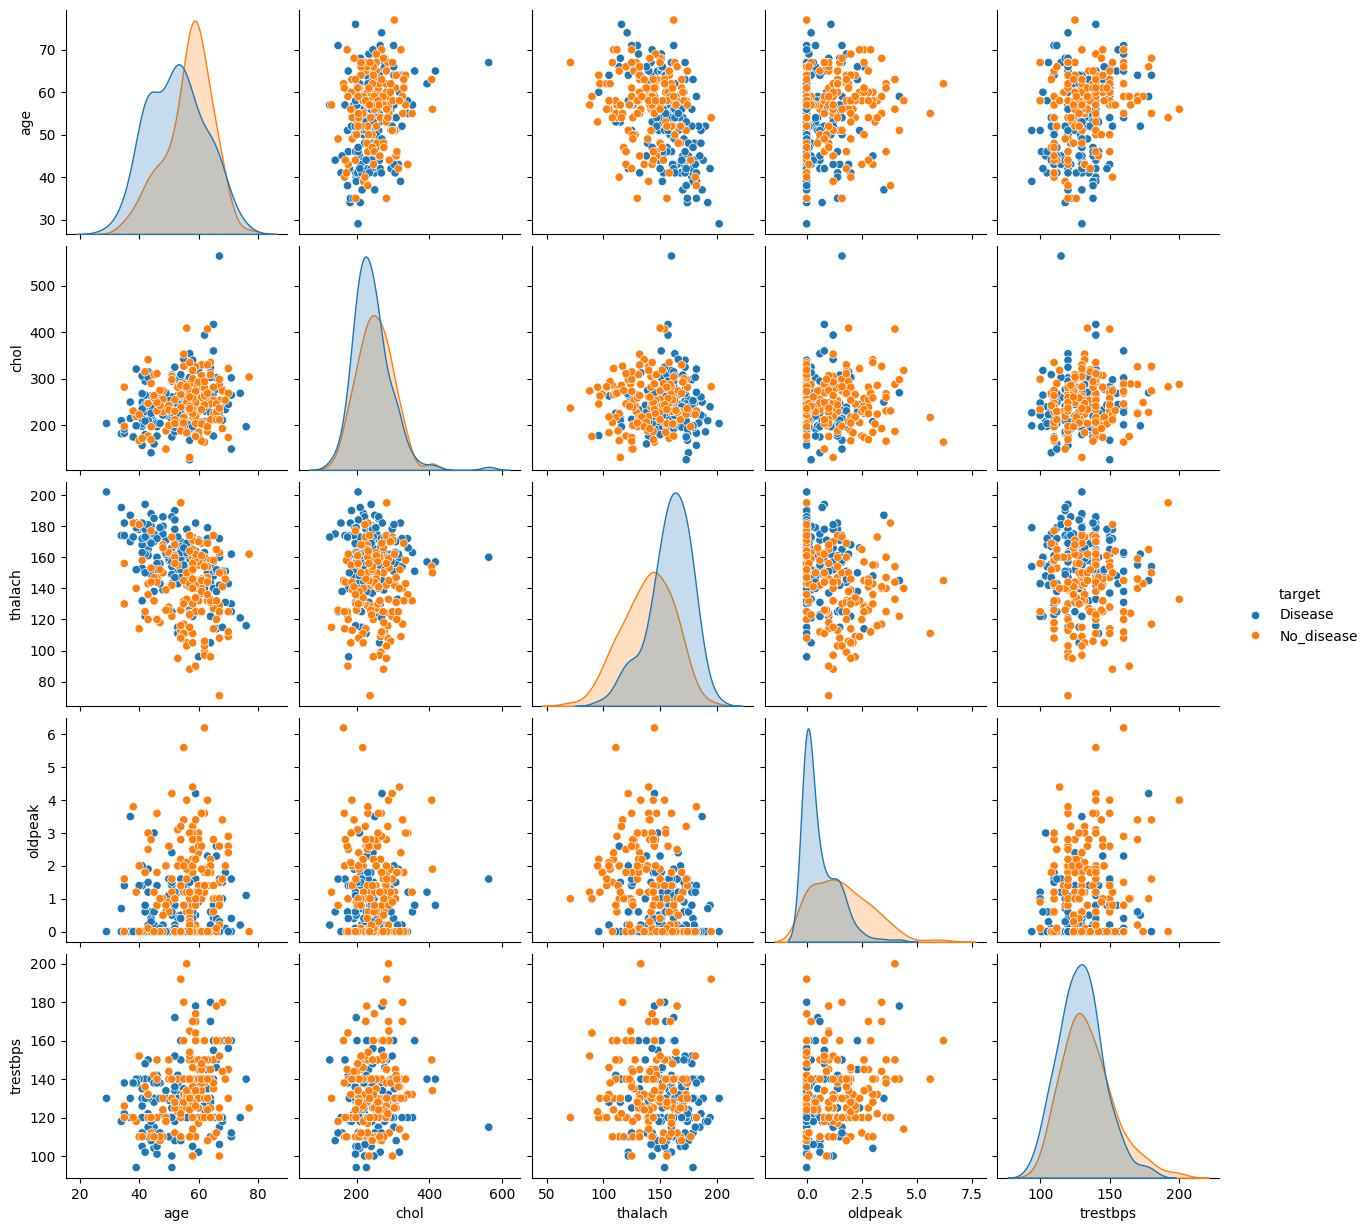

In [16]:
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

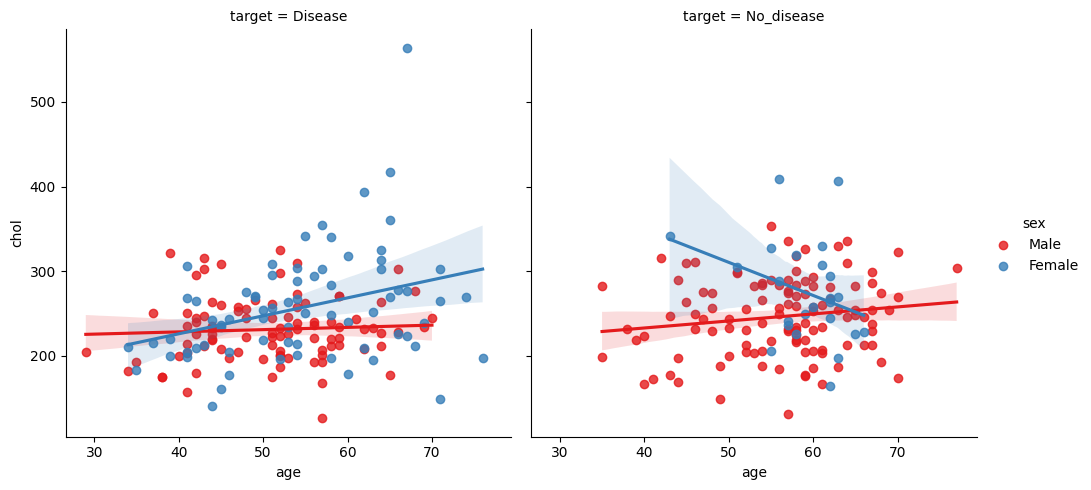

In [17]:
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

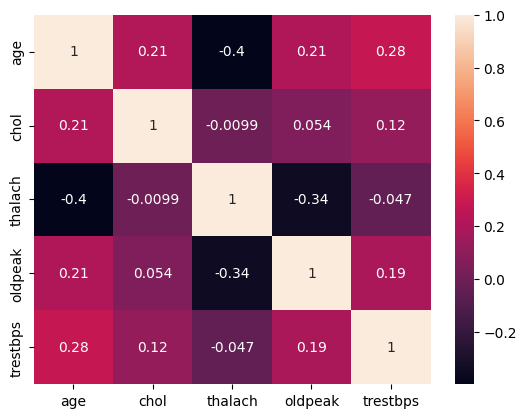

In [18]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

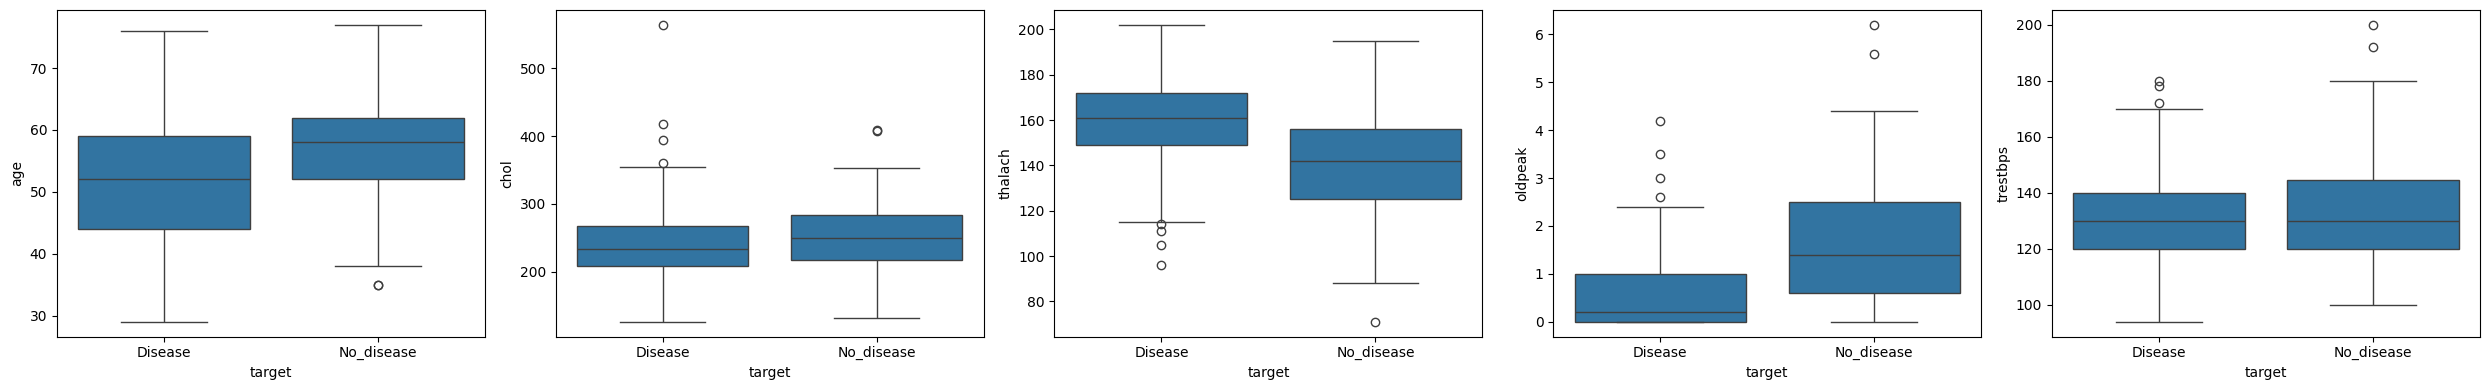

In [19]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

Dimensionality Reduction

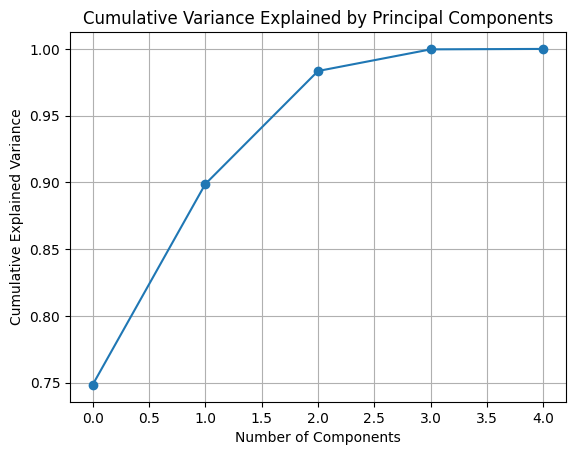

In [20]:
# Assuming 'numeric_data' is your DataFrame containing the numerical features for PCA
pca = PCA()
pca.fit(numeric_data)

# Plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()

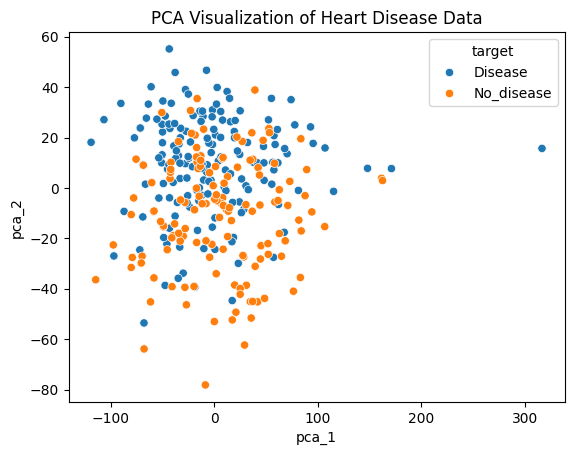

In [21]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()

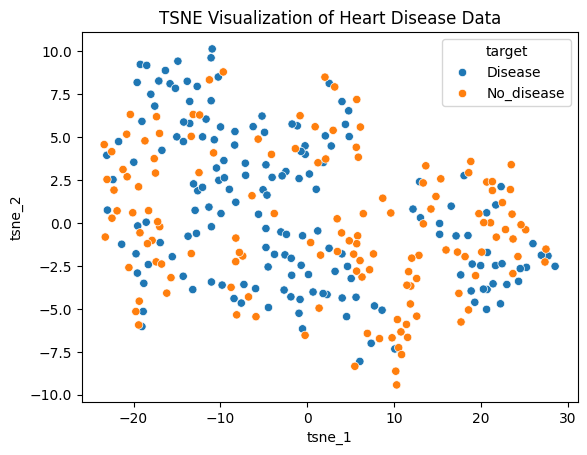

In [22]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()

**Questions**

Based on the plots above, answer the following questions:    


**1. What is the percentage of Samples with Disease?**    


According to the pie chart, 54.5% of the samples have disease, while 45.5% do not.

**2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?**


Based on the histograms:

Age: Higher frequency around ages 50-60, suggesting older individuals may be more prone to heart disease.

Cholesterol (chol): Most values between 200-300, with higher cholesterol levels often linked to heart disease.

Oldpeak: Strongly skewed towards 0, with higher values typically indicating heart disease presence.

These features likely show significant differences between disease and no-disease groups.








**3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?**    


The PCA and t-SNE plots show some clustering but no clear separation between samples with and without disease. This implies that while there are patterns in the data, the features alone may not be sufficient to fully distinguish between the two groups.

**4. What is the optimal number of principal components in our case?**    


Based on the cumulative variance plot, the optimal number of principal components appears to be 2. With 2 components, the cumulative explained variance exceeds 90%, which is typically sufficient to capture most of the data's variability. Adding more components yields diminishing returns in explained variance.

**5. what are the continous features with the highest correation with each other?**

The continuous features with the highest positive correlation are age and trestbps (correlation = 0.28). Although the correlation is relatively low, it’s the strongest positive relationship among the features shown.

#**Exploratory Data Analysis of Nutritional and Ingredient Indicators of Starbucks Dataset**

In [24]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning Minors/Originals/MODULE 2 PROJECT/star_nutri_expanded.csv")

In [25]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


Data Preparation

In [26]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [27]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [28]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [30]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


In [31]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [32]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [33]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [34]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [36]:
data = data.replace({True: 1, False: 0})


In [37]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-37-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [38]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

Data Visualization

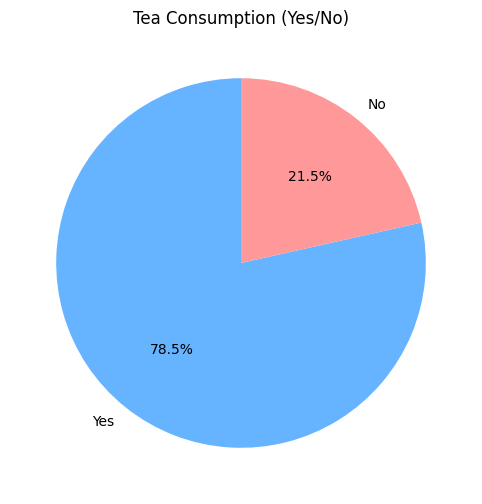

In [41]:
# Creating a binary column for "Tea" (assuming non-zero indicates consumption)
tea_binary = data['Tea'].apply(lambda x: 'Yes' if x > 0 else 'No')
tea_counts = tea_binary.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
tea_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'], labels=['Yes', 'No'])
plt.title('Tea Consumption (Yes/No)')
plt.ylabel('')  # Hides the y-label for a cleaner look
plt.show()

Dimensionality Reduction

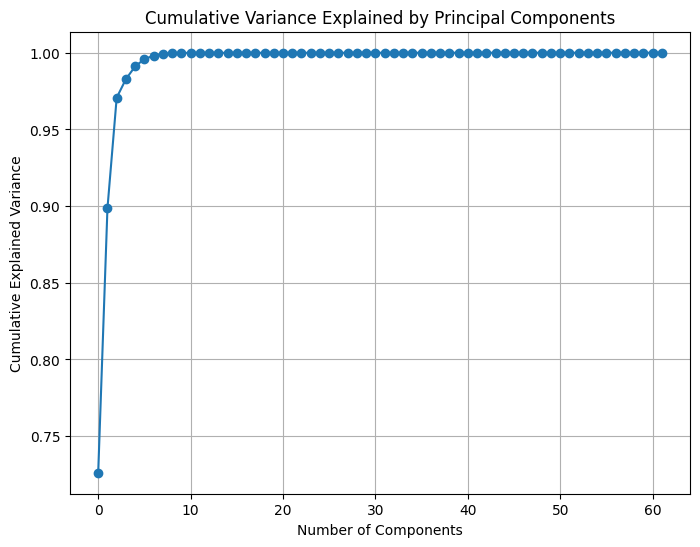

In [45]:
# Perform PCA
pca = PCA()
pca.fit(data)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()

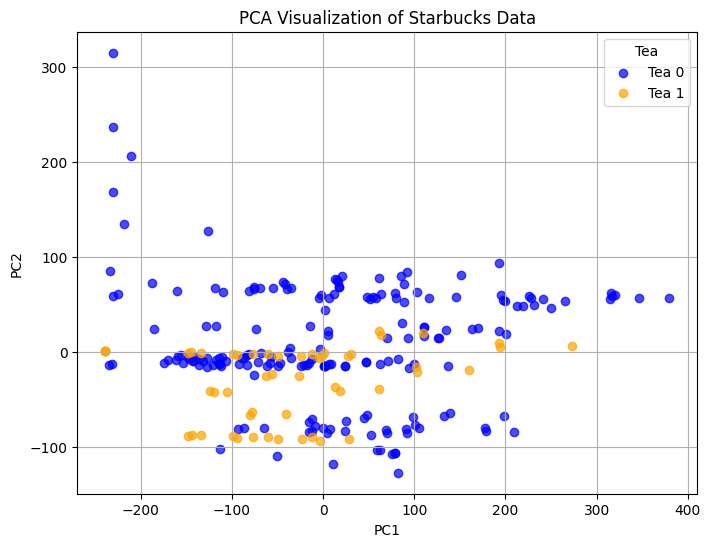

In [48]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the 'Tea' column back to use as labels for the plot
principal_df['Tea'] = data['Tea']

# Plotting the 2 principal components
plt.figure(figsize=(8, 6))
for label, color in zip([0, 1], ['blue', 'orange']):
    subset = principal_df[principal_df['Tea'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Tea {label}', alpha=0.7, color=color)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization of Starbucks Data')
plt.legend(title='Tea')
plt.grid(True)
plt.show()

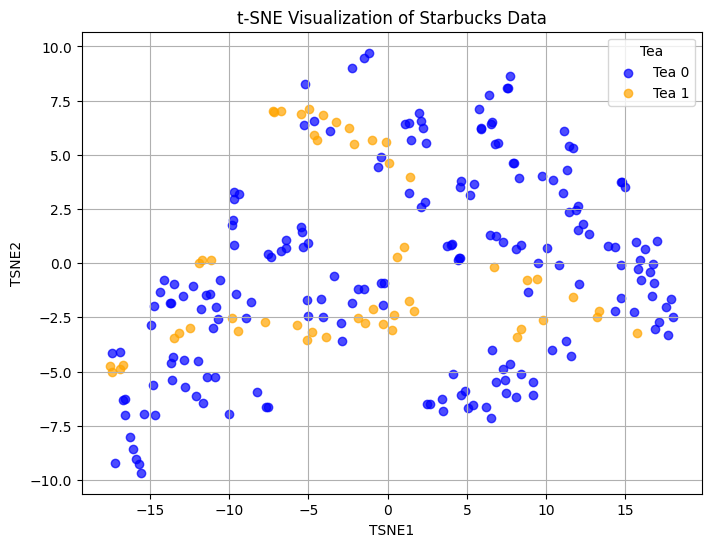

In [49]:
# Perform t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(data)
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])

# Add the 'Tea' column back to use as labels for the plot
tsne_df['Tea'] = data['Tea']

# Plotting the 2 t-SNE components
plt.figure(figsize=(8, 6))
for label, color in zip([0, 1], ['blue', 'orange']):
    subset = tsne_df[tsne_df['Tea'] == label]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Tea {label}', alpha=0.7, color=color)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('t-SNE Visualization of Starbucks Data')
plt.legend(title='Tea')
plt.grid(True)
plt.show()

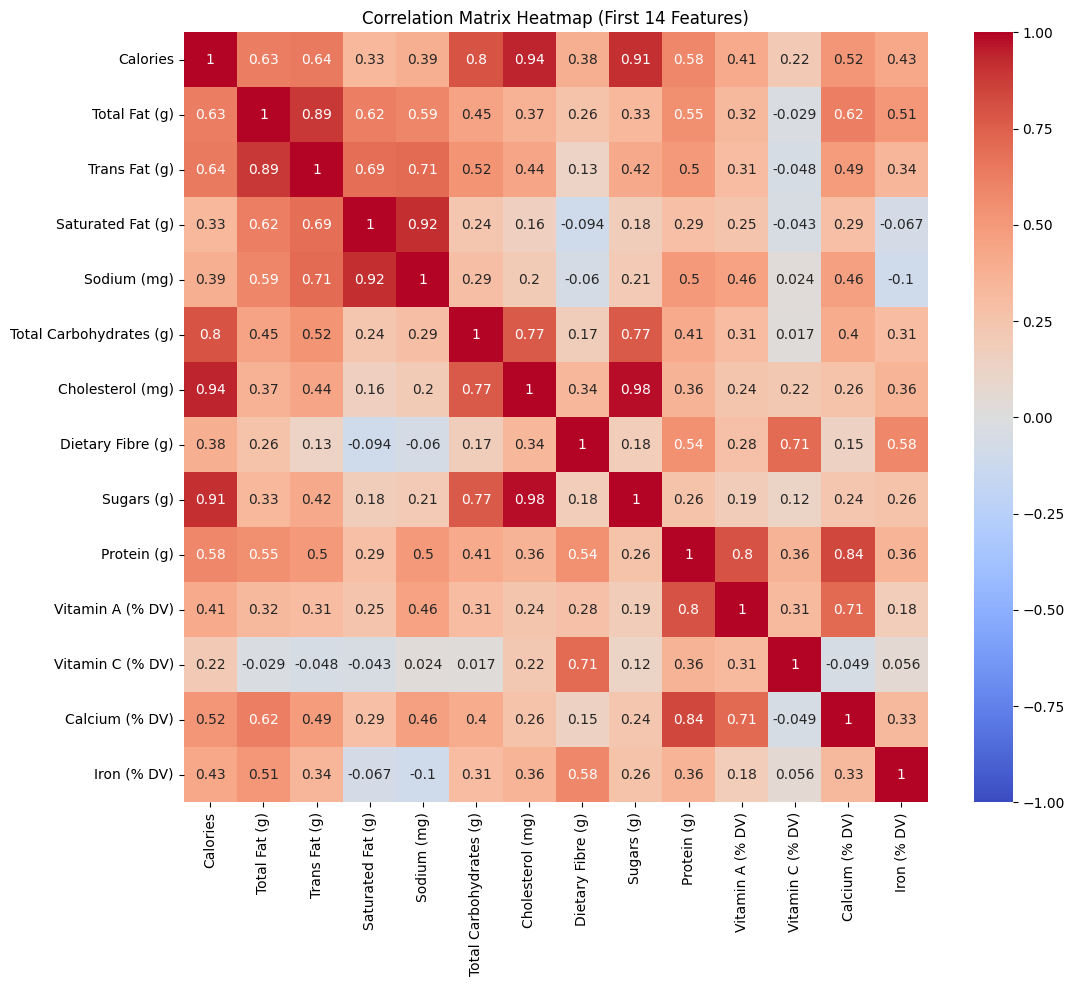

In [54]:
# Select the first 14 columns
first_14_features = data.iloc[:, :14]

# Calculate the correlation matrix for the first 14 features
correlation_matrix = first_14_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap (First 14 Features)')
plt.show()

<ipython-input-56-4236a0e29347>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_14_features['Tea'] = data['Tea']  # Add 'Tea' as a column for grouping


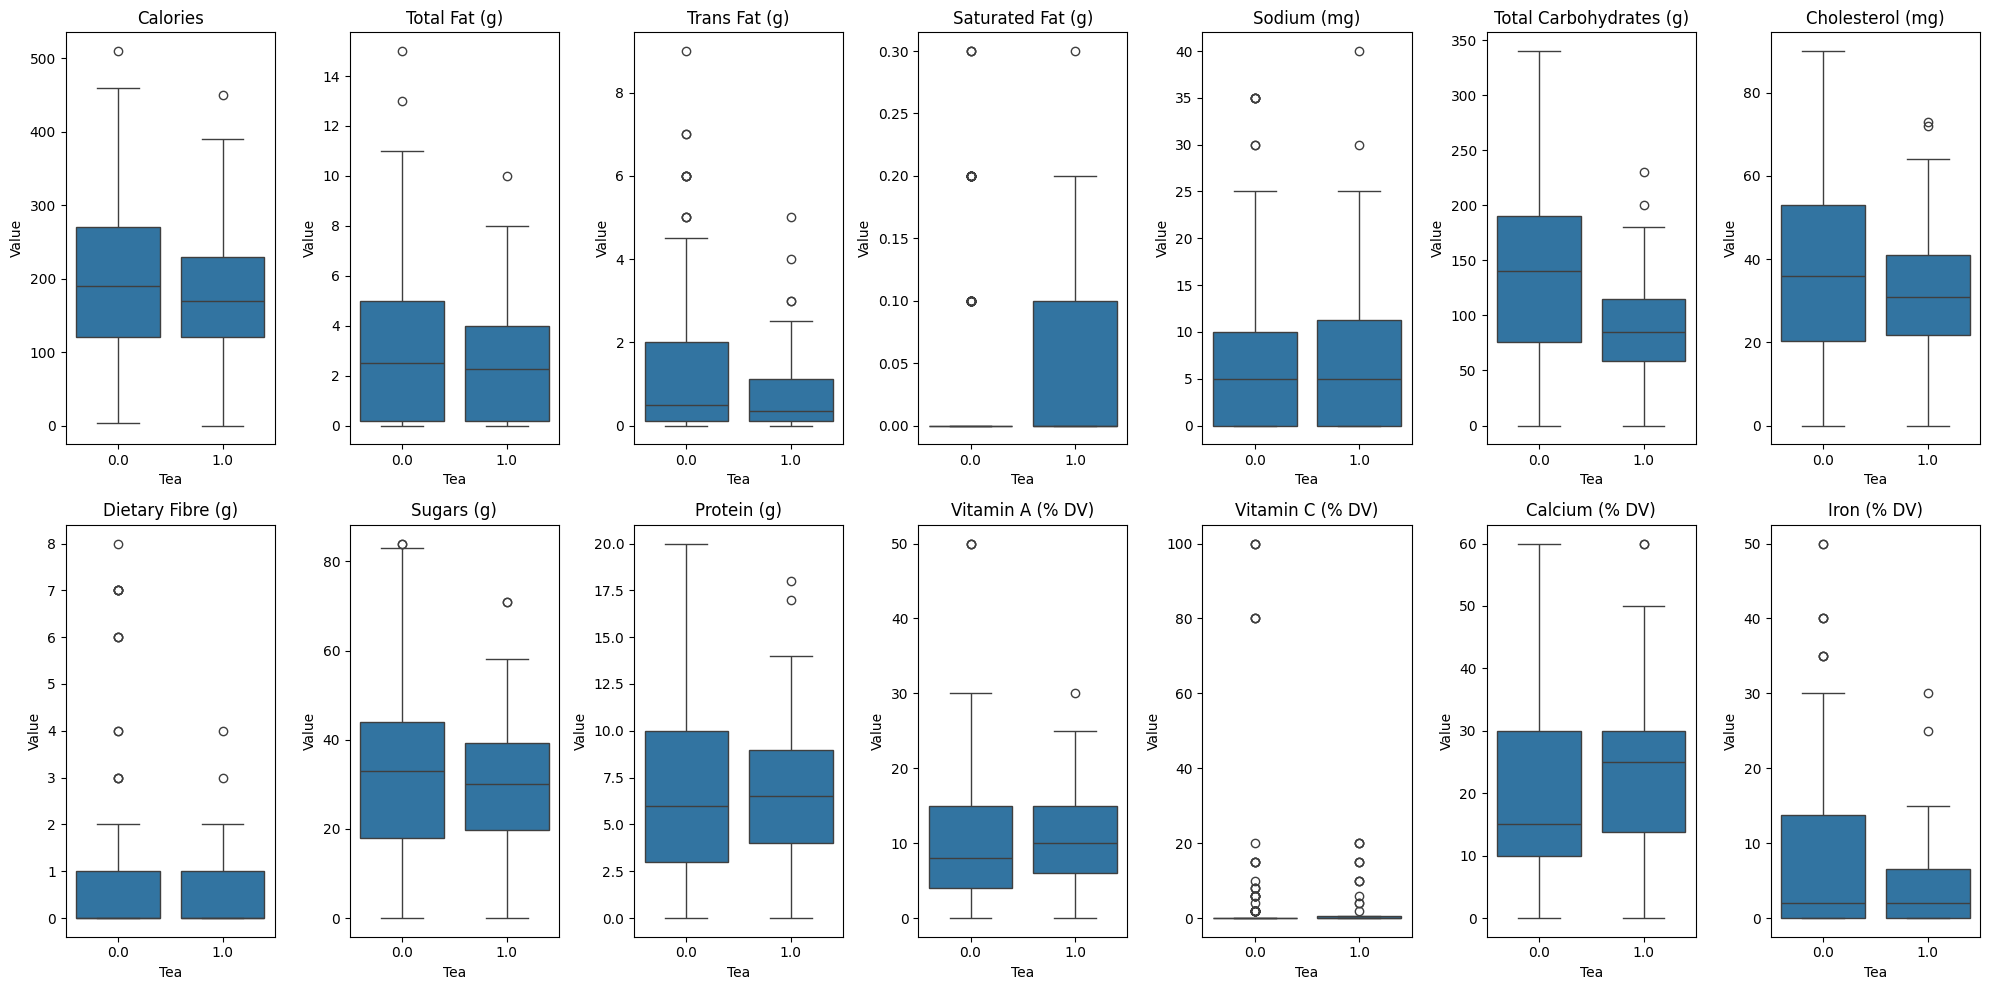

In [56]:
# Select the first 14 columns plus the 'Tea' column
first_14_features = data.iloc[:, :14]
first_14_features['Tea'] = data['Tea']  # Add 'Tea' as a column for grouping

# Plotting boxplots for each feature
plt.figure(figsize=(20, 10))
for i, column in enumerate(first_14_features.columns[:-1], 1):  # Exclude 'Tea' for individual plots
    plt.subplot(2, 7, i)  # Arrange subplots in a 2x7 grid
    sns.boxplot(x='Tea', y=column, data=first_14_features)
    plt.title(column)
    plt.xlabel('Tea')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()